# Pandas vs Dask
### Data processing with Python Pandas vs Dask: an introduction

<br/>Dr Sergio Pintaldi, Data Science Software Engineer
<br/>SIH, University of Sydney

<br/>↓↓↓↓ Slides and code below ↓↓↓↓

[https://github.com/srggrs/ResBaz](https://github.com/srggrs/ResBaz)

## Agenda

### Pandas Quickstart
* Pandas load a CSV
* Pandas operations on Dataframe

### Dask Intro
* Dask data structures
* Dask vs Pandas Example
* Example: read mutliple CSVs
* Example: read huge data (out of RAM ?)

## Objectives

### Learn the basics of Pandas
* DataFrame & Series
* Read & Write a CSV
* Explore data (data stats and plot)

### Learn the basics of Dask
* Dask data structures
* lazy delayed functions
* Dask DataFrame
* Cluster (Scheduler + Workers)

## Pandas basic data structures

dive straight into an example and then exaplain the structure

Let's generate some random data

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(493982)
data = np.random.rand(20, 5)
data

array([[0.74654724, 0.99788419, 0.86591949, 0.41695469, 0.8725506 ],
       [0.87068064, 0.66459727, 0.44992557, 0.26986815, 0.25715698],
       [0.11855892, 0.69057913, 0.65974659, 0.12228396, 0.35230689],
       [0.83246491, 0.41042833, 0.83468465, 0.67801725, 0.13328298],
       [0.63107085, 0.11166736, 0.3768215 , 0.5050874 , 0.50397578],
       [0.09142064, 0.41563447, 0.01123665, 0.42177774, 0.53645722],
       [0.8964898 , 0.61909905, 0.64485439, 0.45374511, 0.30419314],
       [0.82762957, 0.60506176, 0.22260624, 0.33932104, 0.30457279],
       [0.55414776, 0.92551271, 0.07917241, 0.22934229, 0.70126891],
       [0.00580176, 0.56441064, 0.71657418, 0.52606646, 0.70951076],
       [0.67113566, 0.94523831, 0.90580676, 0.38760335, 0.11510539],
       [0.85258045, 0.12584943, 0.73929132, 0.92034466, 0.21199683],
       [0.38914323, 0.59220176, 0.62593959, 0.86293186, 0.42646922],
       [0.74097959, 0.88157047, 0.87566306, 0.7656533 , 0.23863027],
       [0.42049234, 0.12083495, 0.

### *The Series*

In [3]:
ser = pd.Series(data[0])
ser

0    0.746547
1    0.997884
2    0.865919
3    0.416955
4    0.872551
dtype: float64

### *The DataFrame*

In [4]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,0.746547,0.997884,0.865919,0.416955,0.872551
1,0.870681,0.664597,0.449926,0.269868,0.257157
2,0.118559,0.690579,0.659747,0.122284,0.352307
3,0.832465,0.410428,0.834685,0.678017,0.133283
4,0.631071,0.111667,0.376822,0.505087,0.503976
5,0.091421,0.415634,0.011237,0.421778,0.536457
6,0.896490,0.619099,0.644854,0.453745,0.304193
7,0.827630,0.605062,0.222606,0.339321,0.304573
8,0.554148,0.925513,0.079172,0.229342,0.701269
9,0.005802,0.564411,0.716574,0.526066,0.709511


## Pandas Operations

* Accessing Dataframe elements
* Manipulate Columns and Index
* Selection

Display top elements

In [5]:
df.head()

,0,1,2,3,4
0,0.746547,0.997884,0.865919,0.416955,0.872551
1,0.870681,0.664597,0.449926,0.269868,0.257157
2,0.118559,0.690579,0.659747,0.122284,0.352307
3,0.832465,0.410428,0.834685,0.678017,0.133283
4,0.631071,0.111667,0.376822,0.505087,0.503976


Display elements in the last **2** rows

In [6]:
df.tail(2)

,0,1,2,3,4
18,0.330712,0.350900,0.327098,0.579700,0.613374
19,0.482239,0.815541,0.500151,0.722879,0.414540


Assign names to columns and index

In [7]:
df.columns = ['col' + str(x) for x in range(len(df.columns))]
df.head()

,col0,col1,col2,col3,col4
0,0.746547,0.997884,0.865919,0.416955,0.872551
1,0.870681,0.664597,0.449926,0.269868,0.257157
2,0.118559,0.690579,0.659747,0.122284,0.352307
3,0.832465,0.410428,0.834685,0.678017,0.133283
4,0.631071,0.111667,0.376822,0.505087,0.503976


In [8]:
df.index.name = 'my-idx'

In [9]:
df.head()

,col0,col1,col2,col3,col4
my-idx,,,,,
0,0.746547,0.997884,0.865919,0.416955,0.872551
1,0.870681,0.664597,0.449926,0.269868,0.257157
2,0.118559,0.690579,0.659747,0.122284,0.352307
3,0.832465,0.410428,0.834685,0.678017,0.133283
4,0.631071,0.111667,0.376822,0.505087,0.503976


Let's inspect the index

In [10]:
df.index

RangeIndex(start=0, stop=20, step=1, name='my-idx')

And the columns

In [11]:
df.columns

Index(['col0', 'col1', 'col2', 'col3', 'col4'], dtype='object')

Select one column

In [12]:
df['col0']

my-idx
0     0.746547
1     0.870681
2     0.118559
3     0.832465
4     0.631071
5     0.091421
6     0.896490
7     0.827630
8     0.554148
9     0.005802
10    0.671136
11    0.852580
12    0.389143
13    0.740980
14    0.420492
15    0.528703
16    0.610622
17    0.258126
18    0.330712
19    0.482239
Name: col0, dtype: float64

Select multiple columns and display only top elements

In [13]:
df[['col0','col3']].head()

,col0,col3
my-idx,,
0,0.746547,0.416955
1,0.870681,0.269868
2,0.118559,0.122284
3,0.832465,0.678017
4,0.631071,0.505087


Advanced selection

In [14]:
df = df[['col0','col3']].head()
df.loc[df['col0'] > 0.7, :]

,col0,col3
my-idx,,
0,0.746547,0.416955
1,0.870681,0.269868
3,0.832465,0.678017


#### Explanation
`.loc` = Select

`dfnew.loc[df['col0'] > 0.7, :]`

Select `WHERE col0 > 0.7`

In fact `df['col0'] > 0.7`

In [15]:
df['col0'] > 0.7

my-idx
0     True
1     True
2    False
3     True
4    False
Name: col0, dtype: bool

## Example: Loading a CSV and analyse the time series
Example-CSV-time-series.ipynb

## Pandas Recap
* DataFrame & Series
* Read & Write a CSV
* Explore data (data stats and plot)

# Dask

> "Dask is a flexible parallel computing library for analytic computing written in Python"

Another Spark/Hadoop?

## Fundamentals
### Parallelization with ***Delayed***

Example: Generate a list of file names with additional metadata in the name itself

In [16]:
# Remind!!! have you run the datasetup.py ?
# Hint: from datasetup import nasa_files
# nasa_files

In [17]:
from glob import glob
from dateutil import parser
from time import sleep

In [18]:
fnames = glob('data/nasadata/Files/*.txt')
fnames[:10]

['data/nasadata/Files/cloudlow18.txt',
 'data/nasadata/Files/cloudlow51.txt',
 'data/nasadata/Files/surftemp38.txt',
 'data/nasadata/Files/temperature62.txt',
 'data/nasadata/Files/cloudmid11.txt',
 'data/nasadata/Files/surftemp19.txt',
 'data/nasadata/Files/pressure70.txt',
 'data/nasadata/Files/cloudmid21.txt',
 'data/nasadata/Files/ozone32.txt',
 'data/nasadata/Files/ozone42.txt']

Let's have a look at the first lines of one file

In [19]:
with open(fnames[0],'r') as fp:
    for counter,line in enumerate(fp):
        print(line)
        if counter == 6:
            break

             VARIABLE : Mean low cloud amount (%)

             FILENAME : ISCCPMonthly_avg.nc

             FILEPATH : /usr/local/fer_data/data/

             SUBSET   : 24 by 24 points (LONGITUDE-LATITUDE)

             TIME     : 16-JUN-1996 00:00

              113.8W 111.2W 108.8W 106.2W 103.8W 101.2W 98.8W  96.2W  93.8W  91.2W  88.8W  86.2W  83.8W  81.2W  78.8W  76.2W  73.8W  71.2W  68.8W  66.2W  63.8W  61.2W  58.8W  56.2W  

               27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50



We need to identify the file name with the date!

Remind the Objective: enrich the file names with a date!

Let's build the function that generate the file name

In [20]:
def get_date_fname(file_name):
    try:
        with open(file_name,'r') as f:
            for counter, line in enumerate(f):
                if counter == 4:
                    # get the date str
                    datestr = line.split(':',maxsplit=1)[-1]
                    date = parser.parse(datestr[1:12])
                    date = date.strftime('%Y-%m-%d')
                    new_fname = file_name.replace('.txt','_{}.txt'.format(date))
        return (new_fname, file_name)
    except:
        print('not able to retrieve the date')
        return (None, file_name)

Let's simulate a writing function that save the file with the new name and delete the old one

In [21]:
def save_newname(names):
    new, old = names
    # save new file
    # ...
    # delete old file
    # ...
    sleep(0.5)
    return new

Let's run it with Pandas

In [22]:
%%time
final_names = []
for name in fnames:
    temp_names = get_date_fname(name)
    out_name = save_newname(temp_names)
    final_names.append(out_name)
print(final_names[:5])
print(len(final_names))

['data/nasadata/Files/cloudlow18_1996-06-16.txt', 'data/nasadata/Files/cloudlow51_1999-03-16.txt', 'data/nasadata/Files/surftemp38_1998-02-16.txt', 'data/nasadata/Files/temperature62_2000-02-16.txt', 'data/nasadata/Files/cloudmid11_1995-11-16.txt']
504
CPU times: user 419 ms, sys: 45.3 ms, total: 465 ms
Wall time: 4min 12s


Let's try with Dask using _"Delayed"_ 

In [23]:
import warnings
warnings.filterwarnings('ignore')
from dask import delayed

In [24]:
del_get_date_fname = delayed(get_date_fname)
del_save_newname = delayed(save_newname)
del_get_date_fname

Delayed('get_date_fname-755f6e42-6a8a-4dd5-adda-b7b9e67ef771')

Let's apply the delayed function only to the first **5** elements for visualisation purposes

In [25]:
del_list1 = [del_get_date_fname(x) for x in fnames[:5]]
del_list1[:3]

[Delayed('get_date_fname-d34ad8a3-d4e6-45e2-a3b5-883a2a8896e0'),
 Delayed('get_date_fname-e4340828-b253-42e5-b3f7-b6dde0234d7c'),
 Delayed('get_date_fname-27eefbb1-5a4b-4f63-871f-ee5db063f4ff')]

In [26]:
del_list2 = [del_save_newname(y) for y in del_list1]
del_list2[:2]

[Delayed('save_newname-056b9eec-e112-481b-a4c5-78e96a54dac8'),
 Delayed('save_newname-21886e38-7bd1-43c0-b1c8-d7a0ec9d6955')]

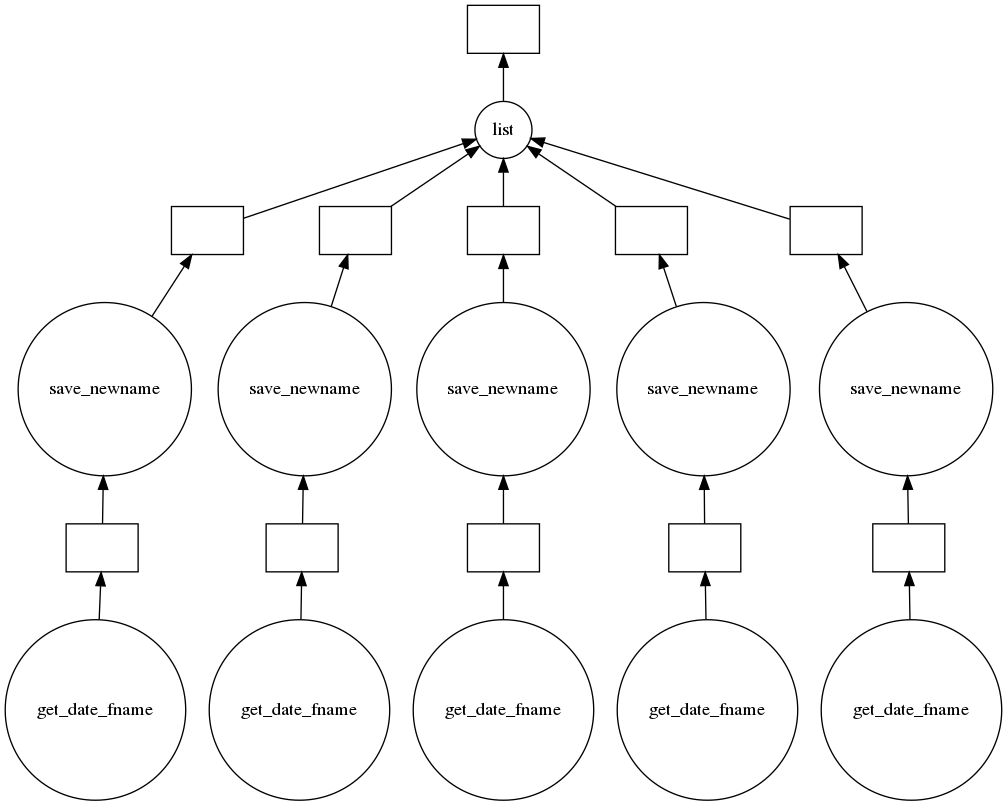

In [27]:
out = delayed(list)(del_list2)
out.visualize(filenam='presentation.png')

Let's put it all together for real

In [28]:
%%time
del_list1 = [del_get_date_fname(x) for x in fnames]
del_list2 = [del_save_newname(y) for y in del_list1]
out = delayed(list)(del_list2)
final_names_dd = out.compute()
print(final_names_dd[:5])
print(len(final_names_dd))

['data/nasadata/Files/cloudlow18_1996-06-16.txt', 'data/nasadata/Files/cloudlow51_1999-03-16.txt', 'data/nasadata/Files/surftemp38_1998-02-16.txt', 'data/nasadata/Files/temperature62_2000-02-16.txt', 'data/nasadata/Files/cloudmid11_1995-11-16.txt']
504
CPU times: user 1.15 s, sys: 155 ms, total: 1.31 s
Wall time: 1min 3s


Dask is designed to work on a single machine, and on a cluster with the same syntax. It performs out-of-core computing (i.e. working on larger than memory data sets) using an approach similar to Spark, by lazily constructing directed acyclic graph (DAG) of tasks and splitting them into small portions

## Dask data structures

### Dask Array

In [ ]:
import h5py
# Numpy
import numpy as np
f = h5py.File('myfile.hdf5')
x = np.array(f['/small-data'])
x - x.mean(axis=1)

# Dask
import dask.array as da
x = da.from_array(f['/big-data'], chunks=(1000, 1000))
x - x.mean(axis=1).compute()

### Dask DataFrame

In [ ]:
import h5py
# Numpy
import pandas as pd
df = pd.read_csv('2015-01-01.csv')
df.groupby(df.user_id).value.mean()

# Dask
import dask.dataframe as dd
df = dd.read_csv('2015-*-*.csv')
df.groupby(df.user_id).value.mean().compute()

### Dask Bag (for everything else)

In [ ]:
import json
import dask.bag as db
b = db.read_text('2015-*-*.json.gz').map(json.loads)

## Dask Scheduler + Workers
The computation engine 

### Single machine
* Synchronous
* Threaded
* Multiprocessing

### Cluster
* Distributed

## Example: Pandas vs Dask multiple CSVs
Example-Dask-multi-csvs.ipynb

## Example: Dask Bag with Scheduler
Example-Dask-bag.ipynb

### Dask Recap
* Dask data structures
* lazy delayed functions
* Dask DataFrame
* Cluster (Scheduler + Workers)

## Quick Tips on Dask Cluster
* Sys Admin! Sys Admin! Sys Admin! (e.g. permissions)
* Use a better NFS (Network File System), like S3 to write and read
* Log everything!

# Thank you!

## Links
### Creating slides using Jupyter Notebook
https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f